# Mesure d'un temps au chronomètre

### Objectif  
Nous allons chercher à quantifier l'impact qu'à un expérimentateur sur un processus de mesure de temps, notament déterminer l'incertitude-type liée à celle-ci. 



<div class="alert alert-block alert-info">
    <big><b> Consignes </b></big> 

<ol>
	<li> Rendez-vous sur le site https://chronometre.minuteur-en-ligne.fr/chronometre-temps-intermediaires.</li>
	<li> Cliquez sur "Démarrer" puis, toutes les 2 secondes, cliquez sur mémoriser (le but est d'être le plus "précis" possible).</li>
	<li> Au bout de 2 minutes cliquez sur arrêter. </li>
	<li> Vérifiez que vous n'avez pas fait de temps intermédiaires supérieurs à 3 secondes ou inférieurs à 1 seconde, sinon recommencez. Le dernier temps peut être supprimé si nécessaire.</li>
	<li> Téléchargez au format .txt votre mesure.</li>
    <li> Renommez ce fichier en << chrono_prenom.txt >>.</li>
	<li> Importez ce fichier dans le dossier de travail (cf image ci-dessous).</li>
	<li> Lancez les lignes de code suivantes en suivant les consignes.</li>
</ol>
</div>

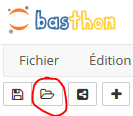

**Importation des bibliothèques**

Executez les commandes ci-dessous

In [1]:
import numpy as np # bibliothèque "scientifique" permettant l'utilisation des fonctions classiques, des tableaux, ...
import numpy.random as rd # génère des nombres aléatoires suivant une certaine distribution
import pandas as pd # gestion des données (import de tableurs csv) 
#import datetime # gestion des temps
import matplotlib.pyplot as plt

**Importation de votre fichier** 

Renommez votre fichier de mesure en "chrono_prenom.txt" puis renommez dans la cellule ci-dessous "chrono_1.txt" en "chrono_prenom.txt". 

In [2]:
File = pd.read_csv(r"chrono_1.txt", delimiter="\t", header = None) # récupération du fichier txt (3ème colonne temps)
#File = pd.read_csv(r'.\chronometre\chrono_2s_b.txt', delimiter="\t", header = None) # récupération du fichier txt (3ème colonne temps)
temps = File.to_numpy() # fichier converti en tableau de chaîne de caractères (format "hh:mm:ss.xxx")

Dt = [] #Liste des intervalles de temps mesurées toutes les 2 secondes    
for i in range(np.size(temps,0)-1):
    t = temps[i,1] #récupération de la colonne des temps en format "hh:mm:ss.xxx"
    # conversion en millisecondes : 
    # des minutes : mm*60*1000
    # des secondes : + ss*1000
    # des millisecondes : + xxx
    Dt.append(float(t[3:5])*60*1000+float(t[6:8])*1000+float(t[9:13]))     

Le code que vous avez lancé dans la cellule du dessus permet d'importer votre fichier de mesure

**Mesure de l'intervalle de temps moyen et écart type de ce processus de mesure**

Executez la cellule ci-dessous et notez les valeurs affichées par la commande print(). 

In [3]:
Dtm = np.mean(Dt) # Moyenne de la série d'observations.
ecart_type = np.std(Dt,ddof=1) # Écart-type de la série d'observations. ddof : degrés de liberté => calcul de l'écart type expérimental (et pas "mathématique")

print("Vous avez effectué N = {:.0f} mesures d'intervalles de temps".format(len(Dt)))
print("La valeur moyenne des durées enregistrées notée Dtm est de {:.1f} milisecondes".format(Dtm))
print("L'écart-type expérimental des durées enregistrées est de {:.1f} milisecondes".format(ecart_type))
print("L'incertitude-type sur une durée Dt censé être de 2 secondes est u(Dt) = {:.2} s".format(ecart_type*1e-3))
print("""Est associée, à la valeur moyenne des durées enregistrées Dtm, une incertite-type : u(Dtm) = {:.2} s""".format(ecart_type*1e-3/np.sqrt(len(Dt))))

Vous avez effectué N = 60 mesures d'intervalles de temps
La valeur moyenne des durées enregistrées notée Dtm est de 2000.9 milisecondes
L'écart-type expérimental des durées enregistrées est de 94.2 milisecondes
L'incertitude-type sur une durée Dt censé être de 2 secondes est u(Dt) = 0.094 s
Est associée, à la valeur moyenne des durées enregistrées Dtm, une incertite-type : u(Dtm) = 0.012 s


**Tracé des différentes mesures**

Lancez le code ci-dessous et visualisez : 
 + l'écart-type (double flèche dont la taille correspond à sa valeur, cf cellule précédente) par rapport à la répartition de vos observations (chaque trait correspond à une observation, il y en a N, cf cellule précédente),
 + comment est placée la moyenne des N observations (trait rouge normalement proche de 2000 ms).

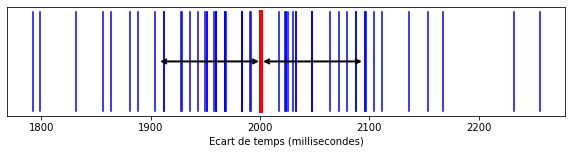

In [4]:
plt.figure(figsize = (10,2)) 
plt.tick_params(left = False, labelleft = False)
plt.plot((Dt,Dt),(0,1), 'blue')
plt.plot((Dtm,Dtm),(0,1), 'red', lw=4)
plt.annotate('',xy=(Dtm-ecart_type,0.5),xytext=(Dtm,0.5), arrowprops=dict(arrowstyle='<->',lw=2))
plt.annotate('',xy=(Dtm,0.5),xytext=(Dtm+ecart_type,0.5), arrowprops=dict(arrowstyle='<->',lw=2))
plt.xlabel('Ecart de temps (millisecondes)')
plt.show()

Le trai rouge représente la valeur moyenne ``Dtm`` de votre processus de mesure et chaque trai bleu une mesure unique.
Les flèches représentent l'écart type ``ecart_type`` (une estimation de sa valeur) qui correspond à la formule :
$$\sigma = \sqrt{\dfrac{\sum_{n=1}^N(x_i-\overline{x})^2}{N-1}}$$
où $\sigma$ est ``ecart_type``, $\overline{x}$ est ``Dtm``, $x_i$ correspond à la i-ème valeur de la liste ``Dt`` et N est la taille de la liste ``Dt``.
Une autre représentation est l'histogramme, ce qui permet de mieux visualiser l'ensemble de vos mesures. Pour cela, lancez la cellule ci-dessous :

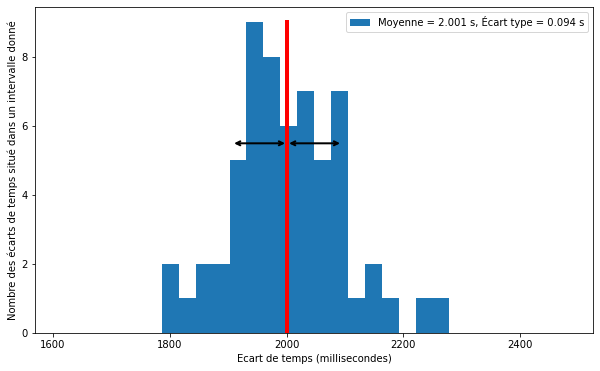

In [5]:
#tracé d'un histogramme de la différence des temps (doit être normalement centré sur 0) 
plt.figure(figsize = (10,6))    
num, bins, patches = plt.hist(Dt,range=(np.min(Dt)*0.9,np.max(Dt)*1.1),bins=30,label='Moyenne = {:.{:}} s, Écart type = {:.2} s'.format(np.mean(Dt)*1e-3,len("{:.2}".format(np.std(Dt,ddof=1)*1e-3))-1,np.std(Dt,ddof=1)*1e-3))
plt.plot((Dtm,Dtm),(0,max(num)),'red',lw=4)
plt.annotate('',xy=(Dtm-ecart_type,max(num)*0.61),xytext=(Dtm,max(num)*0.61), arrowprops=dict(arrowstyle='<->', lw=2))
plt.annotate('',xy=(Dtm,max(num)*0.61),xytext=(Dtm+ecart_type,max(num)*0.61), arrowprops=dict(arrowstyle='<->', lw=2))
plt.xlabel('Ecart de temps (millisecondes)')
plt.ylabel('Nombre des écarts de temps situé dans un intervalle donné')
plt.legend()
plt.show()


Vous pouvez changer la taille des intervales des écarts de temps en changeant la valeur du paramètre `bins` dans la fonction `plt.hist()`

### Cours 
#### Propriétés 
Soit $X$ la notation pour la grandeur à mesurer, $\overline{x}$ la valeur moyenne de $N$ observations. La i-ème observation est notée $x_i$. L'incertitude-type d'$\textbf{une seule}$ obseration est notée $u(X)$. Les deux propriétés suivantes sont supposées vrai en physique :
 + L'incertitude d'$\textbf{une seule}$ obseration $u(X)$ vaut l'écart type expérimental $\sigma$ des N observations.
 + L'incertitude-type associée à la moyenne $u(\overline{x})$ vérifie $u(\overline{x}) = \dfrac{\sigma}{\sqrt{N}}$
 
#### Conventions 
L'écriture d'une valeur $\overline{x}$ d'une grandeur $X$ mesurée en physique expérimentale se fait comme suit :
+ Ne noter que les deux premiers chiffres significatifs du résultat $u(\overline{x})$.
+ Ne noter que les chiffres de \overline{x} qui ont une puissance de 10 supérieure ou égale à la puissance de 10 du deuxième chiffre significatif de $u(\overline{x})$.

Exemple : Un processus de mesure d'une longueur donne comme valeur moyenne brute : $$\rm \overline{\ell} = 0,123456\,m;\, u(\overline{\ell}) = 0,0112\,m.$$ L'écriture correcte du résultat serait : $$\rm \overline{\ell} = 0,123\,m;\, u(\overline{\ell}) = 0,011\,m$$ 

<div class="alert alert-block alert-success">
    <big><b> Questions </b></big> <br>
On note $\Delta t$ la durée à mesurer et $\overline{\Delta t}$ la valeur moyenne des $N$ observations.
<ol>
	<li> Quel est la valeur moyenne des durées obtenues par votre processus de mesure ? Que vaut l'incertitude-type d'$\textbf{une seule}$ observation ? </li>
    <li> Notez le résultat de votre mesure en respectant la forme $\overline{\Delta t} = ... ; u(\overline{\Delta t}) = ... $ où $u(\overline{\Delta t})$ représente l'incertitude-type de la mesure de $\textbf{la moyenne}$ des intervalles enregistrées $\overline{\Delta t}$, soit l'écart-type (qui est aussi l'incertitude-type d'$\textbf{une seule}$ observation $u(\Delta t)$ divisé par la racine carré du nombre de valeurs enregistrées $$u(\overline{\Delta t}) = \dfrac{u(\Delta t)}{\sqrt{N}}$$. </li>
</ol>
</div>

Réponse Q1 : 

Réponse Q2 :

### Génerer l'équivalent de 100000 observations de durées

Réalisez maintenant 100000 observations de durées de 2 secondes au chronomètre. Stop ! Ne le faite pas, cela vous prendrait plus de 5 heures... N'y-a-t'il pas un autre moyen ?

Un moyen utilisé pour générer un grand nombre d'observations en science est de simuler un processus de mesure à partir d'un échantillon d'observations. Les 59 ou 60 observations que vous avez faites vont servir à simuler un ensemble plus grand d'observations que *vous auriez pu* effectuer.

La fonction `rd.normal()` ci-dessous permet de générer un ensemble d'observations typiques d'un expérimentateur (appelé *loi de distribution normale*) tel que la valeur moyenne soit ``Dtm`` (variable déjà crée à ce stade), l'écart type ``ecart_type`` (idem) et le nombre d'observations du nombre que vous voulez (ici `100000`). 

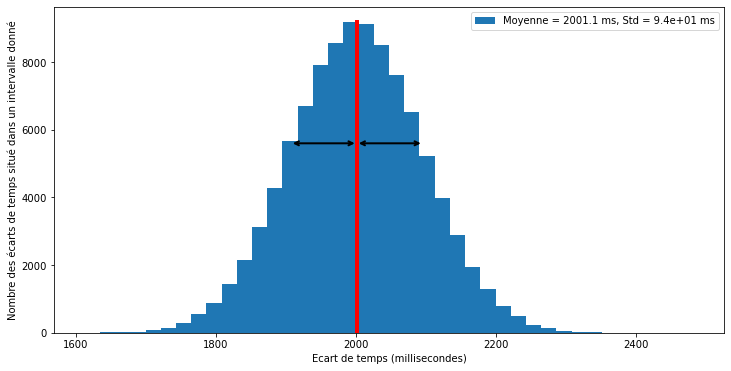

In [6]:
Dt_MC = rd.normal(Dtm,ecart_type,100000) 
Dtm_MC = np.mean(Dt_MC)
ecart_type_MC = np.std(Dt_MC,ddof=1)
plt.figure(figsize=(12,6))   
num, bins, patches = plt.hist(Dt_MC,range=(np.min(Dt)*0.9,np.max(Dt)*1.1),bins=40,label='Moyenne = {:.1f} ms, Std = {:.2} ms'.format(Dtm_MC,ecart_type_MC))
plt.plot((Dtm_MC,Dtm_MC),(0,max(num)),'red',lw=4)
plt.annotate('',xy=(Dtm_MC-ecart_type_MC,max(num)*0.61),xytext=(Dtm_MC,max(num)*0.61), arrowprops=dict(arrowstyle='<->', lw=2))
plt.annotate('',xy=(Dtm_MC,max(num)*0.61),xytext=(Dtm_MC+ecart_type_MC,max(num)*0.61), arrowprops=dict(arrowstyle='<->', lw=2))
plt.xlabel('Ecart de temps (millisecondes)')
plt.ylabel('Nombre des écarts de temps situé dans un intervalle donné')
plt.legend()
plt.show()